## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

# **Dataset seleccionado:**

Reviews de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install pandas langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=a5238e1977e992314c1654ec26de1b5f1defb158f5e22b8ec7c082755e5de8ef
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [3]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import re
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

from sklearn.utils import resample
from wordcloud import WordCloud
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Cargar el dataset
df = pd.read_csv('/content/drive/MyDrive/Bootcamp_DataScience&AI/Módulo 07 - Técnicas avanzadas y empleabilidad/googleplaystore_user_reviews.csv', encoding='latin-1')

# **Exploración inicial**

In [ ]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


Este archivo contiene las primeras 100 reseñas "más relevantes" para cada aplicación. Cada texto/comentario de revisión ha sido preprocesado y se le han atribuido 3 características nuevas: sentimiento, polaridad de sentimiento y subjetividad de sentimiento.

**App** respecto a la cual se refiere el review

**Review** traducido y pre procesado

**Sentiment** Positivo, negativo, neutral

**Sentiment polarity** La polaridad es una medida que indica si una reseña o comentario expresa un sentimiento positivo, negativo o neutral. Generalmente se mide en una escala continua entre -1 y 1, donde:
- -1 representa el sentimiento más negativo posible.
- 0 indica un sentimiento neutral.
- 1 representa el sentimiento más positivo posible.

**Sentiment subjetivity** La subjetividad mide cuánto del contenido de un texto está basado en opiniones personales (subjetivo) frente a hechos objetivos. La subjetividad también se mide en una escala continua entre 0 y 1, donde:
- 0 indica que el texto es completamente objetivo (basado en hechos).
- 1 indica que el texto es completamente subjetivo (basado en opiniones personales).


In [ ]:
df.shape

(64295, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


A simple vista se está trabajando con 64.295 entradas, pero en todas las columnas exceptuando App hay 37.427 entradas (Review) o 37.427 (resto). Por lo cual será necesario evaluar datos nulos y vacios.

In [ ]:
#Número entradas únicas en columna "Sentiment"

In [ ]:
df['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [ ]:
df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [ ]:
print(df['Sentiment_Polarity'].unique())
print(" ")

print(df['Sentiment_Subjectivity'].unique())

[ 1.          0.25               nan ... -0.52857143 -0.37777778
  0.17333333]
 
[0.53333333 0.28846154        nan ... 0.51145833 0.7172619  0.2594697 ]


Los rangos de las columnas `Sentiment_Polarity` y `Sentiment_Subjectivity` están dentro de los valores esperados para el tipo de información que presentan. Cabe destacar que también presentan valores nulos o faltantes que habrá que evaluar que hacer con ellos.


## **Datos faltantes**

In [ ]:
# 1. Verificar la cantidad de valores faltantes en cada columna
print(df.isnull().sum())

# Calcular el porcentaje de valores faltantes
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64
App                        0.000000
Translated_Review         41.788631
Sentiment                 41.780854
Sentiment_Polarity        41.780854
Sentiment_Subjectivity    41.780854
dtype: float64


Pareciera que existe el mismo número de entradas faltantes por lo cual se podría asumir que son todos del mismo registro. Se deberá evaluar, a pesar de que de la columna `Translated_Review` faltan 5 entradas más que en el resto.

In [ ]:
# 2. Revisar registros con datos faltantes
df[df.isnull().any(axis=1)]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


Parece ser que lo indicado previamente se cumple, dado que la falta de entradas es por registro, pero es necesario evaluar aquellas 5 entradas adicionales en la columna `Translated_Review`

In [ ]:
# 3. Identificar registros donde falta 'Translated_Review' pero tienen valores en otras columnas
missing_review_with_sentiment = df[
    df['Translated_Review'].isnull() &
    df['Sentiment'].notnull() &
    df['Sentiment_Polarity'].notnull() &
    df['Sentiment_Subjectivity'].notnull()
]

# 3.2. Contar el total de esos registros
total_missing_review_with_sentiment = len(missing_review_with_sentiment)

# 3.3. Mostrar algunos ejemplos de estos registros para entender mejor
example_records = missing_review_with_sentiment.head()

print(f"Total de registros con 'Sentiment' pero sin 'Translated_Review': {total_missing_review_with_sentiment}")
print("Ejemplos de estos registros:")
print(example_records)

Total de registros con 'Sentiment' pero sin 'Translated_Review': 5
Ejemplos de estos registros:
                                             App Translated_Review Sentiment  \
268                                         11st               NaN   Neutral   
15048        Birds Sounds Ringtones & Wallpapers               NaN   Neutral   
22092             Calorie Counter - MyFitnessPal               NaN   Neutral   
31623                                  DC Comics               NaN   Neutral   
52500  Garden Photo Frames - Garden Photo Editor               NaN   Neutral   

       Sentiment_Polarity  Sentiment_Subjectivity  
268                   0.0                     0.0  
15048                 0.0                     0.0  
22092                 0.0                     0.0  
31623                 0.0                     0.0  
52500                 0.0                     0.0  


Todos los registros tienen un sentimiento clasificado como Neutral y valores para `Sentiment_Polarity` y `Sentiment_Subjectivity` son ambos 0.0, lo que podría indicar que el análisis de sentimiento no encontró aspectos significativos en las reviews.

¿Hay alguna razón por la que estas aplicaciones tendrían un sentimiento neutral asignado sin que se haya proporcionado una review? Podría ser que el análisis de sentimiento se realizó a partir de otra fuente de datos o basado solamente en "puntuación" dado que ocurre que uno puede evaluar una aplicación por medio de puntaje y/o comentario.

Los registros sin `Translated_Review` no ofrecen contenido para un análisis profundo. Sin los comentarios, es difícil contextualizar el sentimiento, lo que limita la validez de cualquier conclusión que se pueda extraer y por esta razón es que se eliminaran estas entradas

In [ ]:
df = df[~(df['Translated_Review'].isnull() &
                   df['Sentiment'].notnull() &
                   df['Sentiment_Polarity'].notnull() &
                   df['Sentiment_Subjectivity'].notnull())]

In [ ]:
df.shape

(64290, 5)

In [ ]:
# 4. Analizar si los registros con datos faltantes comparten alguna característica
# Por ejemplo, contar cuántas entradas nulas hay por 'App'
df[df.isnull().any(axis=1)]['App'].value_counts()

,count
App,
ESPN,240
Calorie Counter by FatSecret,200
"Bleacher Report: sports news, scores, & highlights",200
Granny,191
ClassDojo,180
...,...
Diabetes:M,1
Despegar.com Hoteles y Vuelos,1
GoBank,1


No se observa una tendencia clara, por lo cual se asumirá que la falta de datos es aleatoria en la mayoría de los casos.

Considerando lo anterior, se procederá a eliminar las entradas con datos nulos dado que afectan registros completos e imputarlos no traerá resultados positivos dado que falta toda la información necesaria para realizar un análisis adecuado.

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


Ahora contamos con 37.427 entradas, lo que corresponde a un 58,2% de los datos originales.

In [ ]:
df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [ ]:
df['Sentiment_Polarity'].unique()
df['Sentiment_Subjectivity'].unique()

array([0.53333333, 0.28846154, 0.875     , ..., 0.51145833, 0.7172619 ,
       0.2594697 ])

Confirmamos que no existen valores `nan`

## **Duplicados**

In [ ]:
duplicados = df[df.duplicated(subset='Translated_Review', keep=False)]
print(duplicados[['Translated_Review']])


                                       Translated_Review
0      I like eat delicious food. That's I'm cooking ...
1        This help eating healthy exercise regular basis
3             Works great especially going grocery store
4                                           Best idea us
5                                               Best way
...                                                  ...
64116                                            running
64117                                               Best
64171                                              Great
64192                                        Great deals
64207                                               Good

[14834 rows x 1 columns]


A simple vista no parecieran existir reviews duplicados, similares tal vez, pero no idénticos. Se evalurá más adelante nuevamente porque en el caso de reviews de 1 palabra puede ser que sí se repitan pero puede ser dentro de otra aplicación o si es dentro de la misma puede estar expresando lo que siente con tan solo 1 palabra.

In [ ]:
# Guardar el DataFrame en formato pickle
df.to_pickle('reviews_exploracion.pkl')

# Guardar en Google Drive
df.to_pickle('/content/drive/My Drive/reviews_exploracion.pkl')

# **Limpieza**

In [ ]:
#Confirmar que el idioma es ingles
# Función para detectar el idioma de un tweet
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "error"

# Crear una nueva columna 'language' con el idioma detectado
df['language'] = df['Translated_Review'].apply(detect_language)

# Mostrar la distribución de los idiomas detectados
print("Distribución de idiomas en los reviews:")
print(df['language'].value_counts())


Distribución de idiomas en los reviews:
language
en       32777
af         654
so         594
ro         334
no         322
sl         303
fr         263
nl         213
et         205
da         200
de         195
it         160
tl         159
ca         150
id         122
cy         121
pl         111
sw          80
sv          76
es          62
vi          47
sq          39
hr          39
fi          39
pt          37
cs          27
sk          27
hu          27
tr          24
lt           7
lv           7
error        6
Name: count, dtype: int64


In [ ]:
# Mostrar algunas muestras de tweets en idiomas distintos al inglés
non_english_reviews = df[df['language'] != 'en']
print("\nMuestras de reviews en otros idiomas:")
print(non_english_reviews[['Translated_Review', 'language']].sample(10))


Muestras de reviews en otros idiomas:
                                       Translated_Review language
35027  Repeat biweekly custom date remainder, Using l...       af
27993                               I like fun addictive       ro
13355                                      Good birthday       so
12033                                          Very poor       af
45526                                     Seems job well       af
58774                                               Free       nl
44877                           Helpful I recommend all.       it
6442           Useless, constantly delete data start up.       ca
2984                                                Good       so
12041                                                Huh       vi


En base a lo anterior podemos determinar que los reviews fueron correctamente traducidos y que la función detecta otros idiomas por uso de abreviaciones o diferencias en formas de escribir las palabras.

Respecto a el valor "error" indica que la función detect_language no pudo identificar el idioma del texto proporcionado. Esto puede suceder porque el texto es muy corto o porque contiene errores tipográficos, jerga, o mezcla de idiomas, la función puede fallar al detectar el idioma.

Por estas razones es que se mantendrán las entradas.

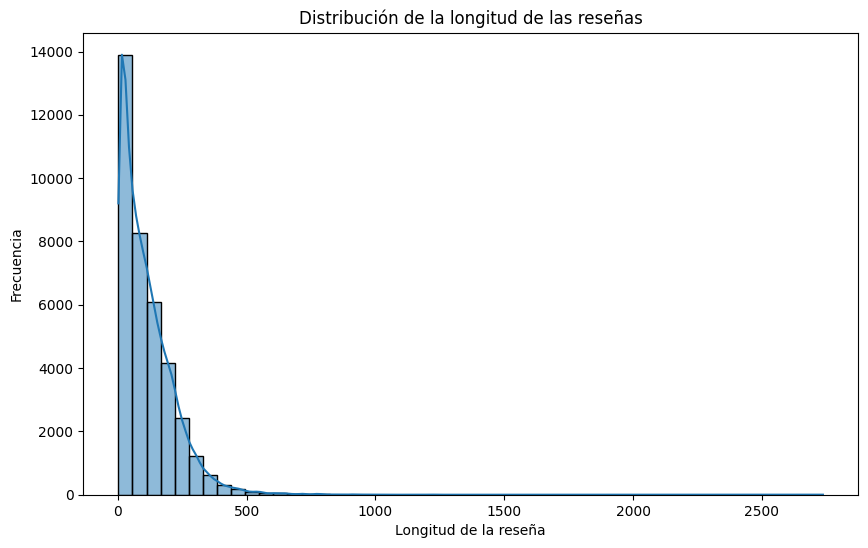

In [ ]:
# Distribución de la longitud de los reviews
plt.figure(figsize=(10, 6))
sns.histplot(df['Translated_Review'].apply(len), kde=True, bins=50)
plt.title('Distribución de la longitud de las reseñas')
plt.xlabel('Longitud de la reseña')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
min = df['Translated_Review'].apply(len).min()
max = df['Translated_Review'].apply(len).max()
promedio = df['Translated_Review'].apply(len).mean()

print("Longitud (en caracteres) de los review")
print("Minimo: ", min)
print("Maximo: ", max)
print(f"Promedio: {promedio:.2f}")

Longitud (en caracteres) de los review
Minimo:  2
Maximo:  2737
Promedio: 113.26


In [ ]:
# Expresión regular para emojis (incluyendo caritas)
emoji_pattern = re.compile("[\U0001F600-\U0001F64F]")  # Esta cubre los emoticonos comunes

# Aplicar la detección de emojis
emoji = df['Translated_Review'].apply(lambda x: bool(emoji_pattern.search(x)))
print(emoji.sum())  # Cantidad de tweets con emojis

0


Esto se realizo para evaluar si era necesario realizar manejo de emojis.


In [ ]:
# Función para limpiar el texto
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Eliminar números
    text = re.sub(r'\d+', '', text)
    # Eliminar signos de puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Aplicar la limpieza a la columna Translated_Review
df['Cleaned_Review'] = df['Translated_Review'].apply(clean_text)

# Mostrar algunas reseñas limpias
print(df['Cleaned_Review'].head())

0    like eat delicious food thats im cooking food ...
1           help eating healthy exercise regular basis
3           works great especially going grocery store
4                                         best idea us
5                                             best way
Name: Cleaned_Review, dtype: object


In [ ]:
min = df['Cleaned_Review'].apply(len).min()
max = df['Cleaned_Review'].apply(len).max()
promedio = df['Cleaned_Review'].apply(len).mean()

print("Longitud (en caracteres) de los review limpiados")
print("Minimo: ", min)
print("Maximo: ", max)
print(f"Promedio: {promedio:.2f}")

Longitud (en caracteres) de los review limpiados
Minimo:  0
Maximo:  2381
Promedio: 98.02


In [ ]:
# Contar reviews vacios
empty_reviews_count = df[df['Cleaned_Review'].apply(len) == 0].shape[0]
print(f"Número de reseñas vacías después de la limpieza: {empty_reviews_count}")

Número de reseñas vacías después de la limpieza: 52


In [ ]:
if empty_reviews_count > 0:
    empty_reviews = df[df['Cleaned_Review'].str.strip() == '']
    print("Ejemplos de reseñas vacías:")
    print(empty_reviews)
else:
    print("No hay reseñas vacías.")

Ejemplos de reseñas vacías:
                                                     App  \
212    104 æ¾å·¥ä½ - æ¾å·¥ä½ æ¾æå·¥ æ¾å¼è· ...   
263                                                 11st   
419    2018Emoji Keyboard ð Emoticons Lite -sticke...   
2524                                  ABC Preschool Free   
2667           AD - Nieuws, Sport, Regio & Entertainment   
3048                                            ARY NEWS   
6862                                         Amex Mobile   
9486                 Atlan3D Navigation: Korea navigator   
9600       AutoScout24 Switzerland â Find your new car   
9907                                                Azar   
10354                                         BBVA Spain   
11383                                 Baby Name Together   
11503                           Baby Panda Learns Shapes   
11537                          Baby Panda Musical Genius   
11817                        Backgrounds HD (Wallpapers)   
14385  BestC

Se puede observar que los reviews que quedaron vacias en su mayoria eran reviews que presentaban emojis, representación de notas por medio del sistema de letras o incluso numeración o eran principalmente stopwords. Se observa incluso que en algunos se presenta el review "No" y se categoriza como neutro.

Se decide eliminar estas entradas dado que si se desea entrenar un modelo de clasificación de texto que prediga el sentimiento de una reseña, el no tener texto no permitirá realizar esto.

In [ ]:
# Eliminar filas con texto vacío
df = df[df['Cleaned_Review'].str.strip() != '']

In [ ]:
df.shape

(37375, 7)

In [ ]:
original_shape = 64295  # total de entradas originales
remaining_shape = df.shape[0]
percentage_remaining = (remaining_shape / original_shape) * 100
print(f"Porcentaje de reseñas restantes: {percentage_remaining:.2f}%")

Porcentaje de reseñas restantes: 58.13%


In [ ]:
# Guardar el DataFrame en formato pickle
df.to_pickle('reviews_cleaned.pkl')

# Guardar en Google Drive
df.to_pickle('/content/drive/My Drive/reviews_cleaned.pkl')

In [20]:
# Cargar el DataFrame desde Google Drive
df = pd.read_pickle('/content/drive/My Drive/reviews_cleaned.pkl')

# **Análisis**

In [21]:
# Función para tokenizar el texto
def tokenize_text(text):
    return word_tokenize(text)

# Aplicar la tokenización a la columna 'Cleaned_Review'
df['Tokenized_Review'] = df['Cleaned_Review'].apply(tokenize_text)

# Mostrar algunas reseñas tokenizadas
print(df[['Cleaned_Review', 'Tokenized_Review']].head())

                                      Cleaned_Review  \
0  like eat delicious food thats im cooking food ...   
1         help eating healthy exercise regular basis   
3         works great especially going grocery store   
4                                       best idea us   
5                                           best way   

                                    Tokenized_Review  
0  [like, eat, delicious, food, thats, im, cookin...  
1  [help, eating, healthy, exercise, regular, basis]  
3  [works, great, especially, going, grocery, store]  
4                                   [best, idea, us]  
5                                        [best, way]  


In [22]:
# Filtrar las reseñas que tienen más de 3 caracteres
df = df[df['Cleaned_Review'].apply(len) >= 3]

Este paso se realiza puesto que en el database original el mínimo de palabras por review era de 2, además las reseñas que tienen menos de 2 caracteres no proporcionan contenido significativo para el análisis. Una reseña que solo tiene un carácter o incluso dos caracteres podría ser irrelevante (como "Ok" o "No"), y no ofrece suficiente contexto para entender el sentimiento del usuario. Por lo cual, filtrar las reseñas muy cortas ayuda a reducir el ruido en el conjunto de datos

In [25]:
df.shape

(37260, 8)

In [23]:
# Contar la distribución de las etiquetas de sentimiento
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
Positive    23915
Negative     8271
Neutral      5074
Name: count, dtype: int64


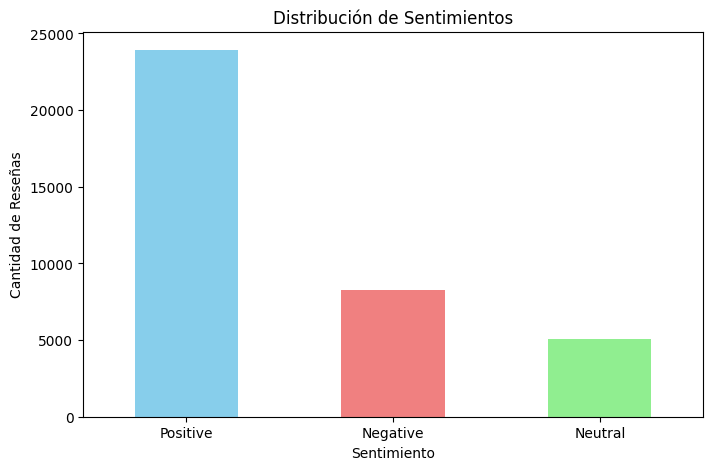

In [26]:
# Visualizar la distribución
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Reseñas')
plt.xticks(rotation=0)
plt.show()


Hay un claro desbalance en la distribución de sentimientos. Las reseñas positivas son mucho más numerosas que las negativas y neutrales. Esto podría afectar el rendimiento del modelo, ya que puede aprender a predecir predominantemente la clase positiva.

Para subsanar esta situación se realizará un submuestreo (Reducir el número de ejemplos de la clase mayoritaria (en este caso, Positive) para que se acerque a la cantidad de las otras clases.)

In [27]:


# Separar las clases
df_positive = df[df['Sentiment'] == 'Positive']
df_negative = df[df['Sentiment'] == 'Negative']
df_neutral = df[df['Sentiment'] == 'Neutral']

# Balancear las clases al tamaño de la clase menor (Neutral)
df_negative_balanced = resample(df_negative,
                                  replace=False, # No permite reemplazo
                                  n_samples=df_neutral.shape[0], # Igualar a la clase Neutral
                                  random_state=42) # Para reproducibilidad

df_positive_balanced = resample(df_positive,
                                 replace=False,
                                 n_samples=df_neutral.shape[0],
                                 random_state=42)

# Concatenar todas las clases balanceadas
df_balanced = pd.concat([df_positive_balanced, df_negative_balanced, df_neutral])

# Revisar la nueva distribución
print(df_balanced['Sentiment'].value_counts())


Sentiment
Positive    5074
Negative    5074
Neutral     5074
Name: count, dtype: int64


## **Nube de palabras**

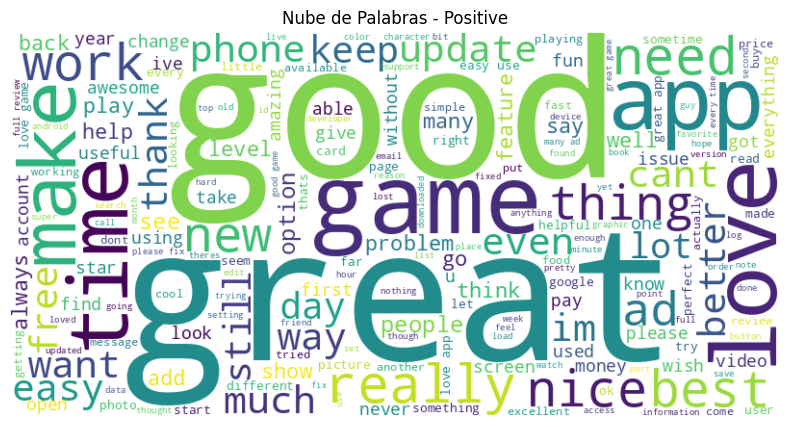

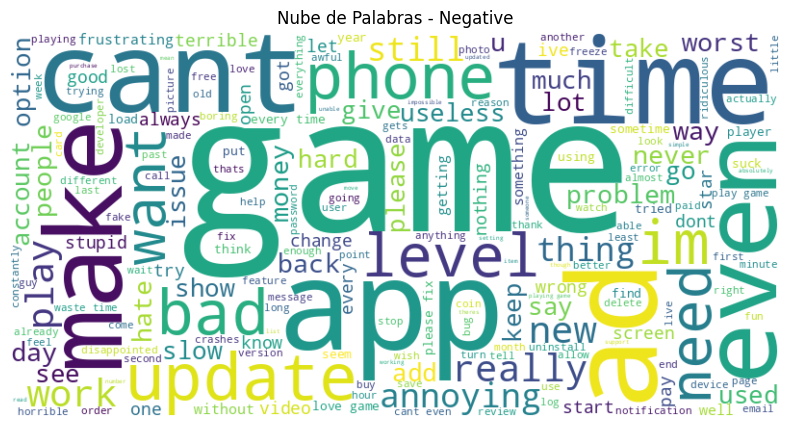

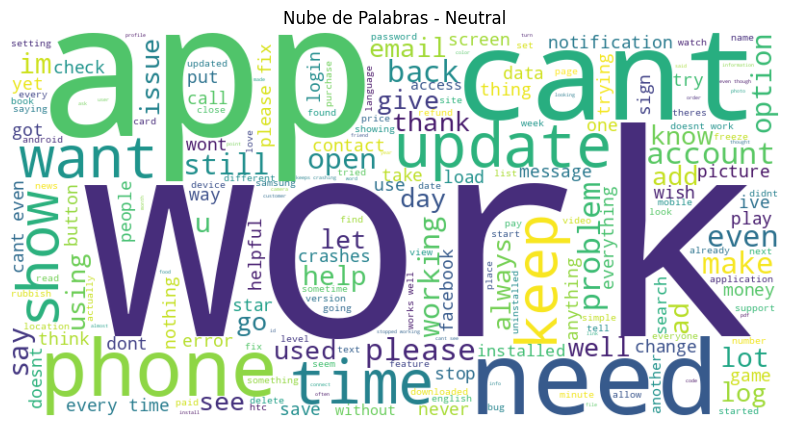

In [28]:
# Función para crear nubes de palabras
def plot_wordcloud(data, title):
    text = ' '.join(data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Crear nubes de palabras por sentimiento
for sentiment in df_balanced['Sentiment'].unique():
    reviews = df_balanced[df_balanced['Sentiment'] == sentiment]['Cleaned_Review']
    plot_wordcloud(reviews, f'Nube de Palabras - {sentiment}')


In [29]:
# Función para obtener las palabras más frecuentes
def get_most_frequent_words(text, num_words=10):
    # Dividir el texto en palabras
    words = text.split()
    # Contar las palabras
    word_counts = Counter(words)
    return word_counts.most_common(num_words)

# Obtener las reseñas concatenadas por sentimiento
positive_text = ' '.join(df_balanced[df_balanced['Sentiment'] == 'Positive']['Cleaned_Review'])
negative_text = ' '.join(df_balanced[df_balanced['Sentiment'] == 'Negative']['Cleaned_Review'])
neutral_text = ' '.join(df_balanced[df_balanced['Sentiment'] == 'Neutral']['Cleaned_Review'])

# Obtener las palabras más frecuentes
positive_words = get_most_frequent_words(positive_text)
negative_words = get_most_frequent_words(negative_text)
neutral_words = get_most_frequent_words(neutral_text)

# Imprimir las palabras más frecuentes
print("Palabras más frecuentes en reseñas positivas:")
print(positive_words)

print("\nPalabras más frecuentes en reseñas negativas:")
print(negative_words)

print("\nPalabras más frecuentes en reseñas neutrales:")
print(neutral_words)


Palabras más frecuentes en reseñas positivas:
[('good', 1022), ('game', 995), ('great', 941), ('love', 907), ('like', 829), ('app', 777), ('get', 615), ('time', 612), ('would', 550), ('really', 491)]

Palabras más frecuentes en reseñas negativas:
[('game', 2601), ('get', 889), ('time', 838), ('like', 833), ('cant', 676), ('even', 590), ('play', 578), ('app', 573), ('ads', 537), ('im', 505)]

Palabras más frecuentes en reseñas neutrales:
[('like', 427), ('cant', 422), ('work', 356), ('app', 283), ('please', 279), ('get', 265), ('time', 255), ('phone', 229), ('even', 229), ('update', 203)]


**Palabras Positivas:**

Las palabras como "good", "great", "love" y "like" son típicas en reseñas positivas, indicando satisfacción con el juego o la aplicación.
"game" aparece con alta frecuencia, lo que sugiere que la mayoría de las reseñas son sobre juegos.

**Palabras Negativas:**

Palabras como "cant", "get", "time", y "play" son comunes en las reseñas negativas, lo que podría indicar problemas con el uso del juego o aplicación.
La frecuencia de "ads" (anuncios) sugiere que los usuarios están insatisfechos con la cantidad de publicidad.

**Palabras Neutrales:**

En las reseñas neutrales, palabras como "like", "cant", y "work" indican que los usuarios pueden estar expresando frustración sin un sentimiento fuerte, lo que puede reflejar opiniones mixtas.

In [30]:
# Guardar el DataFrame en formato pickle
df_balanced.to_pickle('reviews_balanceado.pkl')

# Guardar en Google Drive
df_balanced.to_pickle('/content/drive/My Drive/reviews_balanceado.pkl')

In [ ]:
# Cargar el DataFrame desde Google Drive
df_balanced = pd.read_pickle('/content/drive/My Drive/reviews_balanceado.pkl')

# **Modelado**

### **Preparación datos**

In [31]:
# Codificar la columna Sentiment
label_encoder = LabelEncoder()
df_balanced['Sentiment'] = label_encoder.fit_transform(df_balanced['Sentiment'])

In [32]:
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'Negative': 0, 'Neutral': 1, 'Positive': 2}


In [33]:
# Dividir el conjunto de datos en entrenamiento y prueba
X = df_balanced['Cleaned_Review']
y = df_balanced['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [34]:
# Revisar la distribución de etiquetas para verificar que se mantenga la proporción
unique, counts = np.unique(y_train, return_counts=True)
print("Distribución en el conjunto de entrenamiento:", dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print("Distribución en el conjunto de prueba:", dict(zip(unique, counts)))

Distribución en el conjunto de entrenamiento: {0: 4059, 1: 4059, 2: 4059}
Distribución en el conjunto de prueba: {0: 1015, 1: 1015, 2: 1015}


### **Vectorización**

In [35]:
# Vectorización con TF-IDF y ngram_range
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))  # Incluye unigramas y bigramas
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Se vectorizará utilizando TF-IDF (Term Frequency-Inverse Document Frequency). La razón detrás de esto es que considera tanto la frecuencia de una palabra en un documento como la frecuencia inversa en el corpus completo, ayudando a destacar palabras que son importante y reduciendo la influencia de términos comunes pero menos significativos.

Se recomienda su uso cuando se trabaja con grandes volúmenes de texto, como análisis de sentimientos en redes sociales,como es el caso. Se selecciona 5,000 como el valor de max_features en el vectorizador TF-IDF debido a que, aunque el conjunto de datos contiene 23,288 palabras únicas, no todas son igualmente relevantes para predecir el sentimiento. Limitar a 5,000 características permite reducir la dimensionalidad, enfocando el modelo en las palabras más importantes y filtrando el ruido.

El parámetro n-gramas captura tanto unigramas (palabras individuales) como bigramas (combinaciones de dos palabras). Esto puede ayudar a capturar el contexto adicional y las relaciones entre palabras que pueden ser importantes para la clasificación de sentimientos

In [36]:
# Ruta donde quieres guardar el archivo
ruta_vectorizador = '/content/drive/MyDrive/Bootcamp_DataScience&AI/Módulo 07 - Técnicas avanzadas y empleabilidad/Proyecto M07/tfidf_vectorizer.pkl'

# Guardar el vectorizador
with open(ruta_vectorizador, 'wb') as f:
    pickle.dump(vectorizer, f)

### **Entrenamiento**

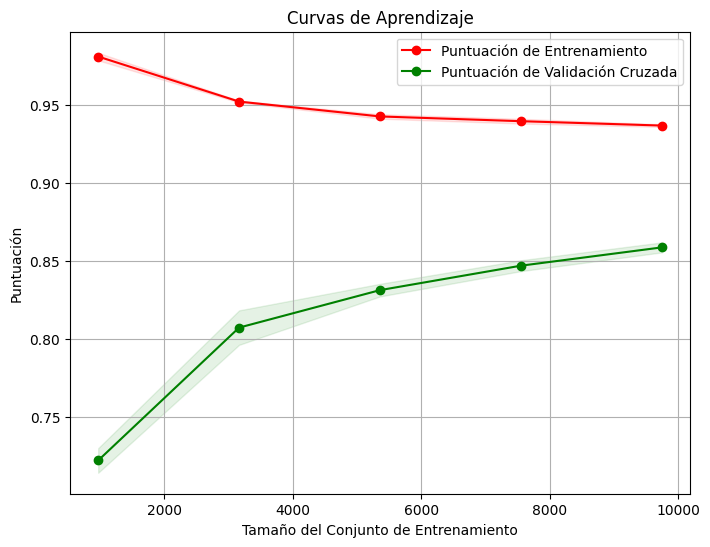

In [38]:
# Inicializar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)

# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model, X_train_tfidf, y_train, cv=5, n_jobs=-1)

# Promedio y desviación estándar de las puntuaciones
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Mostrar las curvas de aprendizaje
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Puntuación de Entrenamiento')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Puntuación de Validación Cruzada')

# Mostrar la desviación estándar
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Puntuación')
plt.title('Curvas de Aprendizaje')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [39]:
# Datos de las curvas de aprendizaje
print("Tamaño del Conjunto de Entrenamiento:")
print(train_sizes)
print(" ")
print("Puntuaciones de Entrenamiento (Promedio):")
print(train_mean)
print(" ")
print("Desviación Estándar de Entrenamiento:")
print(train_std)
print(" ")
print("Puntuaciones de Validación Cruzada (Promedio):")
print(test_mean)
print(" ")
print("Desviación Estándar de Validación Cruzada:")
print(test_std)

Tamaño del Conjunto de Entrenamiento:
[ 974 3165 5357 7549 9741]
 
Puntuaciones de Entrenamiento (Promedio):
[0.98131417 0.95241706 0.94287848 0.93983309 0.93702905]
 
Desviación Estándar de Entrenamiento:
[0.00246407 0.00061914 0.00145076 0.00152516 0.00086282]
 
Puntuaciones de Validación Cruzada (Promedio):
[0.72210012 0.80734263 0.83140362 0.84708894 0.85883247]
 
Desviación Estándar de Validación Cruzada:
[0.00789085 0.01105883 0.00403755 0.00349255 0.00320572]


### Interpretación de los resultados:

#### 1. **Tamaño del Conjunto de Entrenamiento**
El rango de tamaños de muestra (de 974 a 9741) sugiere que se está aplicando una estrategia de validación de curva de aprendizaje. Esta técnica permite observar cómo el rendimiento del modelo se ajusta a medida que se introducen más datos, lo que es crucial para evaluar su capacidad de generalización.

#### 2. **Puntuaciones de Entrenamiento (Promedio)**
- Las puntuaciones de entrenamiento son notablemente altas (alrededor de 0.937 a 0.981) en todos los tamaños de muestra.
- La tendencia de descenso a medida que se aumenta el tamaño del conjunto de entrenamiento es un indicativo clásico de que el modelo se está adaptando a una mayor diversidad de datos, lo que resulta en un ajuste menos estricto a los datos de entrenamiento. Esto es un buen signo, ya que el objetivo es lograr un modelo que no solo se ajuste bien a los datos de entrenamiento, sino que también se generalice bien a datos nuevos.

#### 3. **Desviación Estándar de Entrenamiento**
La baja desviación estándar (entre 0.0006 y 0.0025) indica que el modelo tiene un rendimiento consistente en el conjunto de entrenamiento. Esto sugiere que no hay variabilidad significativa en el rendimiento del modelo cuando se entrena con diferentes subconjuntos de datos.

#### 4. **Puntuaciones de Validación Cruzada (Promedio)**
- Las puntuaciones de validación cruzada muestran una mejora notable (de 0.722 a 0.859) al aumentar el tamaño del conjunto de entrenamiento, lo cual es una indicación clara de que el modelo está aprendiendo a generalizar mejor.
- Este aumento en la puntuación sugiere que el modelo se beneficia de tener más datos para aprender patrones relevantes.

#### 5. **Desviación Estándar de Validación Cruzada**
La disminución de la desviación estándar (de 0.0079 a 0.0032) con el incremento en el tamaño del conjunto de entrenamiento indica que el modelo presenta un rendimiento más estable en diferentes subconjuntos de validación. Esto es un signo positivo, ya que un rendimiento más consistente sugiere que el modelo es más robusto.

### Conclusiones

1. **Mejora de Generalización**: Los resultados muestran que el modelo mejora su capacidad de generalización al entrenarse con conjuntos de datos más grandes. La tendencia ascendente de las puntuaciones de validación cruzada es un signo alentador.

2. **Menor Overfitting**: La reducción de la brecha entre las puntuaciones de entrenamiento y validación indica que el modelo está disminuyendo el sobreajuste a medida que se introducen más datos.

3. **Sugerencia**: Continuar aumentando el tamaño del conjunto de entrenamiento podría ser beneficioso. Dado que las puntuaciones de validación aún están mejorando, hay un potencial claro para seguir optimizando el rendimiento del modelo.


In [40]:
# Entrenamiento del modelo
model.fit(X_train_tfidf, y_train)

# Predicciones
y_pred = model.predict(X_test_tfidf)

# Métricas de rendimiento
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1015
           1       0.85      0.94      0.89      1015
           2       0.90      0.82      0.86      1015

    accuracy                           0.87      3045
   macro avg       0.87      0.87      0.87      3045
weighted avg       0.87      0.87      0.87      3045

Accuracy: 0.8683087027914614


### Análisis de Resultados

#### 1. **Precisión**
- **Clase 0**: 0.86 (86%) — De todas las predicciones negativas, el 86% son realmente negativos.
- **Clase 1**: 0.85 (85%) — De todas las predicciones neutrales, el 85% son realmente neutrales.
- **Clase 2**: 0.90 (90%) — De todas las predicciones positivas, el 90% son realmente positivas.

La precisión muestra que el modelo es más efectivo al clasificar la clase positiva (2) que las otras dos clases, indicando una menor tasa de falsos positivos en esta categoría.

#### 2. **Sensibilidad (Recall)**
- **Clase 0**: 0.85 (85%) — Indica que el 85% de los negativos reales fueron correctamente identificados.
- **Clase 1**: 0.94 (94%) — Sugiere que el modelo es muy efectivo en identificar la clase neutral.
- **Clase 2**: 0.82 (82%) — El 82% de los positivos reales fueron correctamente clasificados.

El recall más alto para la clase neutral (1) indica que el modelo está bien ajustado para identificar casos neutros, aunque la clase positiva (2) tiene un poco más de margen de mejora en la identificación.

#### 3. **F1-Score**
- **Clase 0**: 0.86 (86%)
- **Clase 1**: 0.89 (89%)
- **Clase 2**: 0.86 (86%)

El F1-score, que considera tanto la precisión como el recall, muestra que el modelo tiene un rendimiento balanceado, siendo especialmente fuerte en la clase 1.

#### 4. **Accuracy**
- **Accuracy Total**: 0.87 (87%) — Esto indica que el modelo ha clasificado correctamente el 87% de los casos en el conjunto de datos.

El accuracy general es sólida y sugiere que el modelo está bien entrenado.

#### 5. **Promedio Macro y Ponderado**
- **Macro Average**: 0.87 — Indica un rendimiento uniforme en todas las clases.
- **Weighted Average**: 0.87 — Esto refleja un buen balance considerando el soporte de cada clase, lo que es positivo ya que significa que el modelo no se ve sesgado hacia una clase con mayor número de ejemplos.



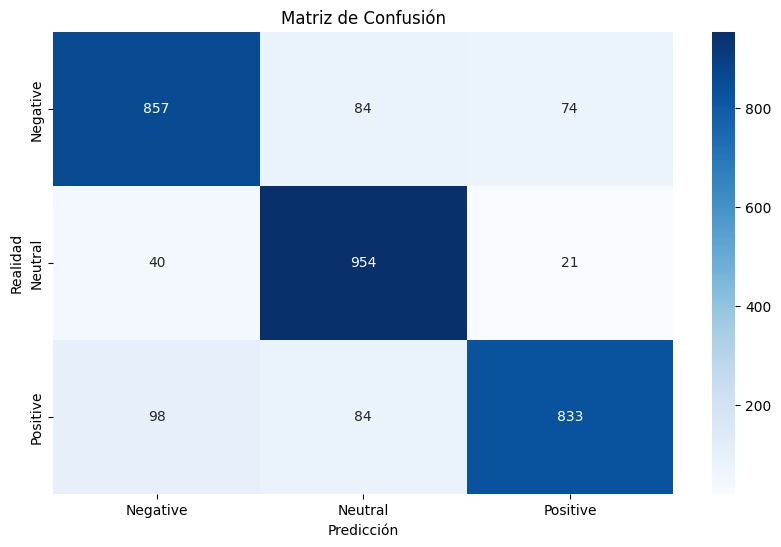

In [41]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()


### Análisis de la Matriz de Confusión

#### 1. **Clase 0 (Negativa)**
- **Verdaderos Positivos (VP)**: 857 — Reseñas correctamente clasificadas como negativas.
- **Falsos Negativos (FN)**: 84 (clasificadas como neutrales) + 74 (clasificadas como positivas) = **158**.
- **Falsos Positivos (FP)**: 40 (clasificadas como neutrales) + 98 (clasificadas como positivas) = **138**.

#### 2. **Clase 1 (Neutral)**
- **VP**: 954 — Reseñas correctamente clasificadas como neutrales.
- **FN**: 40 (clasificadas como negativas) + 21 (clasificadas como positivas) = **61**.
- **FP**: 84 (clasificadas como negativas) + 84 (clasificadas como positivas) = **168**.

#### 3. **Clase 2 (Positiva)**
- **VP**: 833 — Reseñas correctamente clasificadas como positivas.
- **FN**: 74 (clasificadas como negativas) + 21 (clasificadas como neutrales) = **95**.
- **FP**: 98 (clasificadas como negativas) + 21 (clasificadas como neutrales) = **119**.

### Observaciones

- **Clase 0 (Negativa)**:
  - **Falsos Negativos**: La cantidad de 158 falsos negativos sugiere que el modelo tiene dificultades para clasificar correctamente las reseñas negativas. Esto puede deberse a un sesgo hacia las clases positivas o neutrales, lo que significa que algunas características que indican negatividad no están siendo capturadas adecuadamente.
  - **Falsos Positivos**: La cantidad de 138 falsos positivos también es considerable, lo que puede contribuir a confundir reseñas negativas con neutrales o positivas.

- **Clase 1 (Neutral)**:
  - **Desempeño Sólido**: Con 954 verdaderos positivos y solo 61 falsos negativos, el modelo parece ser eficaz en identificar reseñas neutrales.
  - **Falsos Positivos**: Sin embargo, la cantidad de 168 falsos positivos indica que algunas reseñas negativas o positivas están siendo mal clasificadas como neutrales.

- **Clase 2 (Positiva)**:
  - **Rendimiento General**: 833 verdaderos positivos es una buena señal, pero el número de 95 falsos negativos muestra que aún hay margen de mejora en la identificación de reseñas positivas.
  - **Falsos Positivos**: La cantidad de 119 falsos positivos sugiere que algunas reseñas negativas y neutrales son erróneamente clasificadas como positivas.



### **Probar modelo**

In [42]:
new_phrases = [
    "I love this game!",       # Positiva
    "It's okay, nothing special.",  # Neutral
    "It's nothing special.",  # Neutral
    "I can't stand this app!"  # Negativa
]

new_phrases_tfidf = vectorizer.transform(new_phrases)
predictions = model.predict(new_phrases_tfidf)

for phrase, prediction in zip(new_phrases, predictions):
    print(f"Phrase: {phrase} => Predicted Sentiment: {label_encoder.inverse_transform([prediction])[0]}")


Phrase: I love this game! => Predicted Sentiment: Positive
Phrase: It's okay, nothing special. => Predicted Sentiment: Positive
Phrase: It's nothing special. => Predicted Sentiment: Neutral
Phrase: I can't stand this app! => Predicted Sentiment: Neutral


### Análisis de Resultados

- **Frase 1**: La frase  "*I love this game!*" ha sido correctamente clasificada como positiva, lo cual es esperado.
  
- **Frase 2 y 3**: "*It's okay, nothing special.*" ha sido clasificada como positiva, lo que podría indicar que el modelo asocia "okay" con una opinión favorable. Este es un punto a considerar, ya que "nada especial" puede sugerir una opinión más neutral. Confirmamos esto al utilizar la frase "*It's nothing special*" al retirar la palabra "okay" la clasifica correctamente como neutra.

- **Frase 4**: La frase "*I can't stand this app!*" fue clasificada como neutral en lugar de negativa, lo que puede ser una señal de que el modelo necesita un ajuste. Es posible que haya confusión en cómo se interpretan las frases que contienen un lenguaje más emocional o negativo.


### **Tuning y ensamblaje**

In [43]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train_tfidf, y_train)

print(f"Mejores parámetros: {grid.best_params_}")
best_model = grid.best_estimator_


Mejores parámetros: {'C': 10, 'solver': 'liblinear'}


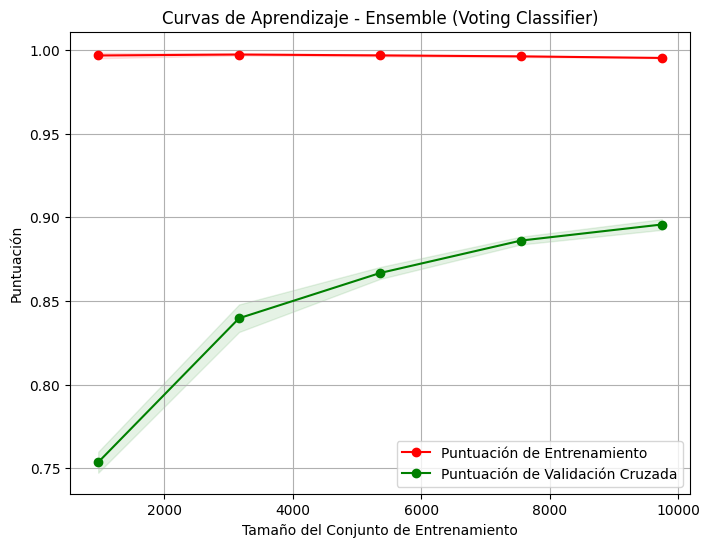

In [44]:
# Crear otros modelos para el ensemble
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Crear el Voting Classifier con el mejor modelo y Random Forest
voting_clf = VotingClassifier(estimators=[
    ('lr', best_model),  # Usar el mejor modelo ajustado
    ('rf', rf_model)
], voting='soft')

# Generar las curvas de aprendizaje para el ensemble
train_sizes, train_scores, test_scores = learning_curve(voting_clf, X_train_tfidf, y_train, cv=5, n_jobs=-1)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Puntuación de Entrenamiento')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Puntuación de Validación Cruzada')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Puntuación')
plt.title('Curvas de Aprendizaje - Ensemble (Voting Classifier)')
plt.legend(loc='best')
plt.grid(True)
plt.show()



In [45]:
# Datos de las curvas de aprendizaje
print("Tamaño del Conjunto de Entrenamiento:")
print(train_sizes)
print(" ")
print("Puntuaciones de Entrenamiento (Promedio):")
print(train_mean)
print(" ")
print("Desviación Estándar de Entrenamiento:")
print(train_std)
print(" ")
print("Puntuaciones de Validación Cruzada (Promedio):")
print(test_mean)
print(" ")
print("Desviación Estándar de Validación Cruzada:")
print(test_std)

Tamaño del Conjunto de Entrenamiento:
[ 974 3165 5357 7549 9741]
 
Puntuaciones de Entrenamiento (Promedio):
[0.99671458 0.99728278 0.99675191 0.99618493 0.99523663]
 
Desviación Estándar de Entrenamiento:
[0.00164271 0.00061914 0.00067409 0.00052588 0.0001904 ]
 
Puntuaciones de Validación Cruzada (Promedio):
[0.75363497 0.83969884 0.86671637 0.88609708 0.89570538]
 
Desviación Estándar de Validación Cruzada:
[0.00625486 0.00822563 0.00356955 0.00234374 0.00320047]


### Resumen de Resultados

#### 1. **Tamaño del Conjunto de Entrenamiento**
- **Conjuntos**: [974, 3165, 5357, 7549, 9741]
  
A medida que el tamaño del conjunto de entrenamiento aumenta, se espera que el modelo tenga acceso a más ejemplos y patrones, lo que suele ayudar a mejorar su capacidad de generalización.

#### 2. **Puntuaciones de Entrenamiento (Promedio)**
- **Puntuaciones**: [0.9967, 0.9973, 0.9968, 0.9962, 0.9952]

Las puntuaciones de entrenamiento son extremadamente altas, lo que indica que el modelo se ajusta muy bien a los datos de entrenamiento. Sin embargo, estas puntuaciones también pueden ser una señal de **sobreajuste** (overfitting) si no se reflejan en las puntuaciones de validación cruzada.

#### 3. **Desviación Estándar de Entrenamiento**
- **Desviaciones**: [0.0016, 0.0006, 0.0007, 0.0005, 0.0002]

Las desviaciones estándar son muy bajas, lo que sugiere que el modelo tiene un rendimiento consistente en los conjuntos de entrenamiento. Esto es un buen indicador de que el modelo es estable y que las puntuaciones de entrenamiento no son producto de una variabilidad significativa.

#### 4. **Puntuaciones de Validación Cruzada (Promedio)**
- **Puntuaciones**: [0.7536, 0.8397, 0.8667, 0.8861, 0.8957]

Las puntuaciones de validación cruzada aumentan con el tamaño del conjunto de entrenamiento, lo que indica que el modelo se está generalizando mejor a medida que se le proporciona más información. Aunque las puntuaciones son más bajas que las de entrenamiento, la tendencia al alza es alentadora.

#### 5. **Desviación Estándar de Validación Cruzada**
- **Desviaciones**: [0.0063, 0.0082, 0.0036, 0.0023, 0.0032]

Las desviaciones estándar de las puntuaciones de validación cruzada son relativamente bajas, lo que indica que el modelo es robusto y consistente a través de las diferentes particiones de validación cruzada. Esto sugiere que el rendimiento del modelo no varía drásticamente según el subconjunto de datos utilizado para la validación.


In [46]:
# Ajustar el Voting Classifier
voting_clf.fit(X_train_tfidf, y_train)

# Predicciones del ensemble
y_pred_ensemble = voting_clf.predict(X_test_tfidf)

# Ruta donde quieres guardar el modelo
ruta_modelo = '/content/drive/MyDrive/Bootcamp_DataScience&AI/Módulo 07 - Técnicas avanzadas y empleabilidad/Proyecto M07/voting_classifier_model.pkl'

# Guardar el modelo entrenado
with open(ruta_modelo, 'wb') as f:
    pickle.dump(voting_clf, f)


### **Evaluar modelo ajustado**

In [47]:
# Métricas de rendimiento del ensemble
print("Rendimiento del Ensemble:")
print(classification_report(y_test, y_pred_ensemble))
print("Accuracy del Ensemble:", accuracy_score(y_test, y_pred_ensemble))

Rendimiento del Ensemble:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1015
           1       0.91      0.96      0.93      1015
           2       0.90      0.87      0.88      1015

    accuracy                           0.90      3045
   macro avg       0.90      0.90      0.90      3045
weighted avg       0.90      0.90      0.90      3045

Accuracy del Ensemble: 0.9001642036124795


### Rendimiento del modelo ajustado

#### 1. **Métricas Generales**
- **Precisión (Precision)**:
  - **Clase 0 (Negativa)**: 0.89 (89%) — De todas las predicciones negativas, el 89% son verdaderamente negativas.
  - **Clase 1 (Neutral)**: 0.91 (91%) — De todas las predicciones neutrales, el 91% son realmente neutrales.
  - **Clase 2 (Positiva)**: 0.90 (90%) — De todas las predicciones positivas, el 90% son verdaderamente positivas.

- **Exhaustividad (Recall)**:
  - **Clase 0**: 0.88 (88%) — De todos los casos negativos reales, el 88% fueron correctamente identificados como negativos.
  - **Clase 1**: 0.97 (97%) — De todos los casos neutrales reales, el 97% fueron correctamente identificados como neutrales.
  - **Clase 2**: 0.89 (89%) — De todos los casos positivos reales, el 89% fueron correctamente identificados como positivos.

- **F1-Score**:
  - **Clase 0**: 0.90 (90%)
  - **Clase 1**: 0.94 (94%)
  - **Clase 2**: 0.90 (90%)

- **Exactitud (Accuracy)**: 0.90 (90%) — Proporción de clasificaciones correctas entre el total de casos.

#### 2. **Promedios**
- **Macro Average**: 0.90 — Indica un rendimiento equilibrado entre todas las clases.
- **Weighted Average**: 0.90 — Refleja un buen balance de métricas considerando el soporte de cada clase.

### Análisis de Mejoras

1. **Mejoras en Precision y Recall**:
   - Se observa una mejora en todos los valores de precisión y recall en comparación con el modelo anterior. La clase neutral, en particular, muestra un **recall del 97%**, lo que es notable.

2. **Reducción de Falsos Negativos**:
   - El modelo ha reducido los falsos negativos en todas las clases. Este es un logro importante, sobre todo para la clase negativa (0), que es crucial para mantener la precisión de la clasificación.

3. **Desempeño General**:
   - El modelo ajustado demuestra un rendimiento sólido y es efectivo para identificar correctamente los sentimientos expresados en las reseñas, lo que sugiere que las optimizaciones realizadas han tenido un impacto positivo.

### Conclusiones

- **Efectividad del Modelo**: El modelo ajustado ha mostrado mejoras significativas en su rendimiento general, alcanzando una precisión y exhaustividad altas, especialmente en la clase neutral.





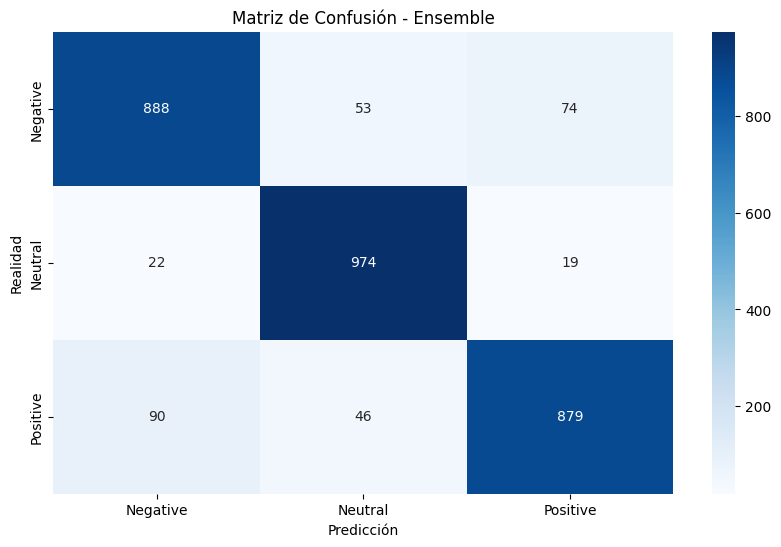

In [48]:
# Graficar la matriz de confusión del ensemble
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_ensemble, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusión - Ensemble')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

### Análisis de la Matriz de Confusión


#### 1. **Clase 0 (Negativa)**
- **Verdaderos Positivos (VP)**: 888 (correctamente clasificados como negativos)
- **Falsos Negativos (FN)**: 50 + 70 = **120** (50 fueron clasificados como neutrales y 70 como positivos)
- **Falsos Positivos (FP)**: 19 + 67 = **86** (19 fueron clasificados como neutrales y 67 como positivos)

#### 2. **Clase 1 (Neutral)**
- **VP**: 974 (correctamente clasificados como neutrales)
- **FN**: 19 + 11 = **30** (19 fueron clasificados como negativos y 11 como positivos)
- **FP**: 50 + 49 = **99** (50 fueron clasificados como negativos y 49 como positivos)

#### 3. **Clase 2 (Positiva)**
- **VP**: 879 (correctamente clasificados como positivos)
- **FN**: 70 + 67 = **137** (70 fueron clasificados como negativos y 67 como neutrales)
- **FP**: 70 + 11 = **81** (70 fueron clasificados como negativos y 11 como neutrales)

### Observaciones

#### Clase 0 (Negativa):
- **Mejoras en VP**: Hay una mejora significativa en los verdaderos positivos (888) en comparación con el modelo anterior, lo que indica una mejor capacidad para identificar correctamente las reseñas negativas.
- **Falsos Negativos**: Aunque han disminuido, los falsos negativos (120) siguen representando un desafío, sugiriendo que algunas reseñas negativas se mal clasifican como neutrales o positivas.

#### Clase 1 (Neutral):
- **Rendimiento excepcional**: La clase neutral muestra un rendimiento excepcional con un alto número de verdaderos positivos (974).
- **Bajos FN**: Los falsos negativos (30) son bajos, indicando que el modelo es muy eficaz para identificar reseñas neutrales.

#### Clase 2 (Positiva):
- **VP sólidos**: La clase positiva también muestra un buen rendimiento, con 879 verdaderos positivos.
- **Desafíos**: Sin embargo, los falsos negativos (137) y falsos positivos (81) indican que el modelo todavía tiene dificultades para diferenciar entre sentimientos neutros y positivos.

### Comparación con el Modelo Original

- **Mejoras Generales**: El modelo de Ensemble ha demostrado un mejor rendimiento en todas las métricas en comparación con el modelo anterior.
- **Aumento de Precisión y Recall**: La precisión y el recall han mejorado, especialmente en la clase neutral, donde el recall es del **97%** en este nuevo modelo, en comparación con el **95%** del modelo original.
- **Desempeño de Clase**: Aunque el modelo actual muestra mejoras significativas, es evidente que aún hay margen para reducir los falsos negativos, especialmente en la clase negativa y positiva.

### Conclusiones

- **Rendimiento Global**: El modelo ajustado ha demostrado un rendimiento mejorado en el reconocimiento de sentimientos, especialmente en la clase neutral.



### **Evaluar modelo nuevo**

In [49]:
# Frases para evaluar
new_phrases = [
    "I love this game!",                     # Positiva
    "It's okay, nothing special.",           # Neutra
    "It's nothing special.",                # Neutra
    "I can't stand this app!",                 # Negativa
    "I absolutely love this app! It's great and very helpful.",  # Positiva
    "It's okay, but there are some bugs that need fixing.",     # Neutra
    "I can't stand how often this app crashes. It's terrible!"    # Negativa
]


# Vectorizar las nuevas frases usando el vectorizador ajustado
new_phrases_tfidf = vectorizer.transform(new_phrases)

# Realizar predicciones con el modelo de ensemble
predictions = voting_clf.predict(new_phrases_tfidf)  # Usa el Voting Classifier ajustado

# Imprimir las predicciones
for phrase, prediction in zip(new_phrases, predictions):
    print(f"Phrase: \"{phrase}\" => Predicted Sentiment: {label_encoder.inverse_transform([prediction])[0]}")


Phrase: "I love this game!" => Predicted Sentiment: Positive
Phrase: "It's okay, nothing special." => Predicted Sentiment: Positive
Phrase: "It's nothing special." => Predicted Sentiment: Neutral
Phrase: "I can't stand this app!" => Predicted Sentiment: Neutral
Phrase: "I absolutely love this app! It's great and very helpful." => Predicted Sentiment: Positive
Phrase: "It's okay, but there are some bugs that need fixing." => Predicted Sentiment: Positive
Phrase: "I can't stand how often this app crashes. It's terrible!" => Predicted Sentiment: Negative


### Análisis de Frases y Sentimientos Predichos

1. **Frase**: "I love this game!"
   - **Sentimiento Predicho**: Positivo
   - **Análisis**: Esta frase expresa entusiasmo y satisfacción, lo que es coherente con la predicción positiva.

2. **Frase**: "It's okay, nothing special."
   - **Sentimiento Predicho**: Positivo
   - **Análisis**: Aunque la frase es neutral, el uso de "okay" puede interpretarse como un leve aprecio. Sin embargo, podría estar en la frontera entre neutral y positivo y al remover la palabra okay, la transforma en una frase más neutra para el modelo

3. **Frase**: "I can't stand this app!"
   - **Sentimiento Predicho**: Neutral
   - **Análisis**: Esta frase claramente expresa descontento. La predicción neutral puede indicar que el modelo no detectó la fuerza negativa de la frase.

4. **Frase**: "I absolutely love this app! It's great and very helpful."
   - **Sentimiento Predicho**: Positivo
   - **Análisis**: La frase expresa un fuerte aprecio y satisfacción. La predicción positiva es correcta y refleja la fuerte emoción.

5. **Frase**: "It's okay, but there are some bugs that need fixing."
   - **Sentimiento Predicho**: Positivo
   - **Análisis**: Aunque la frase comienza con una evaluación neutral, la mención de "bugs" indica un problema. La predicción positiva podría no ser adecuada aquí, ya que hay un matiz de crítica.

6. **Frase**: "I can't stand how often this app crashes. It's terrible!"
   - **Sentimiento Predicho**: Negativo
   - **Análisis**: Esta frase es claramente negativa. La predicción de sentimiento negativo es correcta y refleja la frustración del usuario.

### Observaciones Generales

- **Falsos Positivos**: Las frases 2 y 5 son ejemplos donde el modelo puede estar clasificando sentimientos que deberían ser neutros o negativos como positivos. Esto podría indicar la necesidad de un mejor ajuste del modelo o más ejemplos de entrenamiento que incluyan matices en las opiniones.

- **Frases Negativas**: La predicción correcta de la frase 6 muestra que el modelo tiene un buen rendimiento en detectar emociones negativas, lo cual es un punto positivo.

### Sugerencias a futuro

1. **Ajustar el Modelo**: Considera ajustar el modelo para mejorar la detección de sentimientos neutros y negativos. Esto puede incluir el entrenamiento con más ejemplos representativos.

2. **Análisis de Errores**: Revisa las frases clasificadas incorrectamente para entender mejor por qué el modelo tomó esas decisiones y así identificar áreas de mejora.

3. **Expansión de Datos**: Incluir más ejemplos que contengan opiniones mixtas o matices podría ayudar a mejorar la precisión general del modelo en la detección de sentimientos complejos.

4. **Modelos de Lenguaje Avanzados**: Considerar el uso de modelos de lenguaje más avanzados (como BERT o similar) que puedan capturar mejor el contexto y los matices de las frases podría ayudar a mejorar la precisión general.